<a href="https://colab.research.google.com/github/PiyushM1/Car-make-model-and-year-classifier/blob/master/Car_make_model_year_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal


### To train three classifiers to predict a car's make, model and year based on inception_v3 model using [Monk](https://github.com/Tessellate-Imaging/monk_v1)


In [ ]:
# Mount google drive, if using colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/My Drive/PilotTask")  # Change directory to Project_directory

# Table of Contents

1.   Install Monk
2.   Get the dataset
3.   Assign labels to each image in dataset
4.   Directory Structure
4.   Train the models



<a id='0'></a>
# Install Monk

### Method 1: Install from GitHub  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

### Method 2: Install using pip

In [ ]:
# ! pip install -U monk-cuda90      # CUDA 9.0 
# ! pip install -U monk-cuda92      # CUDA 9.0
# ! pip install -U monk-cuda100     # CUDA 10.0
# ! pip install -U monk-cuda101     #CUDA 10.1
# ! pip install -U monk-cuda102     #CUDA 10.2
# ! pip install -U monk-cpu         #CPU (+Mac-OS)
! pip install -U monk-colab       #Google Colab
# ! pip install -U monk-kaggle      #Kaggle

## Dataset

Description: The dataset is divided into two parts, train and test dataset, each containing around 8000 images. The labels corresponding to each image are stored in the devkit.

Link to the dataset: https://ai.stanford.edu/~jkrause/cars/car_dataset.html



In [ ]:
! mkdir data  # Create a directory for the dataset

Train Data

In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_train.tgz" # Train dataset

In [ ]:
!tar -xvf 'cars_train.tgz' -C 'data' #Extracting

Devkit

In [ ]:
!wget "https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz" # Devkit for the dataset

In [ ]:
!tar -xvf 'car_devkit.tgz' -C 'data' #Extracting

Test Data

In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_test.tgz" # Test dataset

In [ ]:
!tar -xvf 'cars_test.tgz' -C 'data' #Extracting

In [ ]:
# Download test annotations with labels
!wget "http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat" -P './data/devkit'

#Loading files containing labels
Descriptions of the files are as follows:

- cars_meta.mat:
  Contains a cell array of class names, one for each class.

- cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:

>  1.   bbox_x1: Min x-value of the bounding box, in pixels
>  2.  bbox_x2: Max x-value of the bounding box, in pixels
>  3.  bbox_y1: Min y-value of the bounding box, in pixels
>  4.  bbox_y2: Max y-value of the bounding box, in pixels
>  5.  class: Integral id of the class the image belongs to.
>  6.  fname: Filename of the image within the folder of images.

- cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

- cars_test_annos_withlabels.mat:
  Same format as 'cars_train_annos.mat', including the class

## For converting the ID to its corresponding label


In [ ]:
from scipy import io  # Required to load .mat file
import pandas as pd

In [ ]:
class_name = io.loadmat('./data/devkit/cars_meta.mat')

In [ ]:
combined = []
for name in class_name['class_names'][0]:
  name=name.flat[0]
  splits = name.split(" ")
  make = splits[0]
  year = splits[len(splits)-1]
  model = ""
  for tmp in splits[1:len(splits)-2]:
    model = model + tmp + "_"
  combined.append([make,model,year])  

###Examples for IDs and class names:

In [ ]:
print("ID\t "+"{:<20}".format("Make")+ "{:<20}".format("Model")+ "{:<20}".format("Year"))
for i in [140,60,18,50,161]:
  print(str(i)+"\t "+"{:<20}".format(combined[i][0])+"{:<20}".format(combined[i][1])+"{:<20}".format(combined[i][2]))

ID	 Make                Model               Year                
140	 Infiniti            G_Coupe_            2012                
60	 Chevrolet           Impala_             2007                
18	 Audi                TT_                 2011                
50	 Cadillac            CTS-V_              2012                
161	 Mercedes-Benz       C-Class_            2012                


For assigning a label to each image in the train dataset

In [ ]:
train_labels = io.loadmat('./data/devkit/cars_train_annos.mat')

In [ ]:
data=[[row.flat[0] for row in line][4:] for line in train_labels['annotations'][0]]

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data]
model= [[row[1],combined[row[0]-1][1]] for row in data]
year = [[row[1],combined[row[0]-1][2]] for row in data]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year.csv", index = False)

Sample entries from vehicles_make.csv
<pre>
ID              Label
00014.jpg       Dodge
00036.jpg       Ferrari
00048.jpg       Rolls-Royce
</pre>

Sample entries from vehicles_model.csv
<pre>
ID              Label
00014.jpg       Caravan_
00036.jpg       458_Italia_
00048.jpg       Phantom_
</pre>

Sample entries from vehicles_year.csv
<pre>
ID              Label
00014.jpg       1997
00036.jpg       2012
00048.jpg       2012
</pre>

Images in dataset:

00014.jpg

<img src="https://drive.google.com/uc?export=view&id=1-0_eoMety04waAk3r29RMGfkwWsOQW58" alt="00014.jpg" width="350"/>

00036.jpg 

<img src="https://drive.google.com/uc?export=view&id=113F-nZDoU9JyfrKjdUikepdEpGU5LeIX" alt="00036.jpg" width="350"/>

00048.jpg 

<img src="https://drive.google.com/uc?export=view&id=12IlZGMq3icNLuHfA3L7nyc2LRG0XbEP-" alt="00048.jpg" width="350"/>

For assigning a label to each image in the test dataset

In [ ]:
test_labels = io.loadmat('./data/devkit/cars_test_annos_withlabels.mat')

In [ ]:
data_test=[[row.flat[0] for row in line][4:] for line in test_labels['annotations'][0]]

In [ ]:
# Separating make, model and year for each image and saving them in different csv files
make = [[row[1],combined[row[0]-1][0]] for row in data_test]
model= [[row[1],combined[row[0]-1][1]] for row in data_test]
year = [[row[1],combined[row[0]-1][2]] for row in data_test]

df = pd.DataFrame(make, columns = ['ID', 'Labels'])
df.to_csv("vehicles_make_test.csv", index = False)
df = pd.DataFrame(model, columns = ['ID', 'Labels'])
df.to_csv("vehicles_model_test.csv", index = False)
df = pd.DataFrame(year, columns = ['ID', 'Labels'])
df.to_csv("vehicles_year_test.csv", index = False)

#Directory structure



```
./Project_directory/ (root_dir)
      |
      |-----------data (for dataset)
      |              |
      |              |-----------cars_test
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------cars_train
      |              |              |
      |              |              |----------00001.jpg
      |              |              |----------00002.jpg
      |              |              |----------........(and so on)
      |              |
      |              |-----------devkit
      |              |              |
      |              |              |----------cars_meta.mat			
      |              |              |----------cars_train_annos.mat  
      |              |              |----------train_perfect_preds.txt
      |              |              |----------cars_test_annos.mat		
      |              |              |----------eval_train.m
      |              |              |----------cars_test_annos_withlabels.mat	
      |              |              |----------README.txt
      |
      |-----------monk_v1 (Monk library)
      |              |
      |              |----------....
      |                             _
      |-----------car_devkit.tgz     |
      |-----------cars_train.tgz     |   (zipped dataset files)
      |-----------cars_test.tgz     _|
      |                                    _
      |-----------vehicles_make.csv         |
      |-----------vehicles_model.csv        |
      |-----------vehicles_year.csv         |
      |                                     |  (csv files containing labels)
      |-----------vehicles_make_test.csv    |
      |-----------vehicles_model_test.csv   |
      |-----------vehicles_year_test.csv   _|

      

```



# Imports

In [ ]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [ ]:
# Installing required libraries if not installed using pip
!pip install GPUtil
!pip install pylg

In [ ]:
# For Keras backend
# from keras_prototype import prototype

# Using mxnet-gluon backend 
# from gluon_prototype import prototype

# For pytorch backend
from pytorch_prototype import prototype

<a id='3'></a>
# Make Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Make_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_make.csv",
                   split=0.8, input_size=299, 
                   batch_size=128, 
                   shuffle_data=True, 
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Make_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_make.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  128
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      49



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);

# Load model
gtf.Model()

# Freeze first 100 layers of the pretrained model
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=5, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
# gtf.List_Losses()
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Make_classifier
    Project Dir:     workspace/Make_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Make_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_make.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  49

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.45

In [ ]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_make_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=1);
gtf.Prototype("Make_classifier", "inception-v3-pytorch", eval_infer=True);

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Make_classifier/inception-v3-pytorch/output/models/final
    Model loaded!

Experiment Details
    Project: Make_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Make_classifier/inception-v3-pytorch/



In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

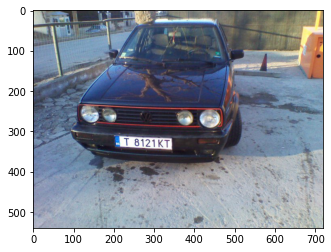

Prediction
    Image name:         ./data/cars_test/00026.jpg
    Predicted class:      Volkswagen
    Predicted score:      0.37266838550567627

{'img_name': './data/cars_test/00026.jpg', 'predicted_class': 'Volkswagen', 'score': 0.3726684}


In [ ]:
img_name = "./data/cars_test/00026.jpg"     # Expected output: Volkswagen

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

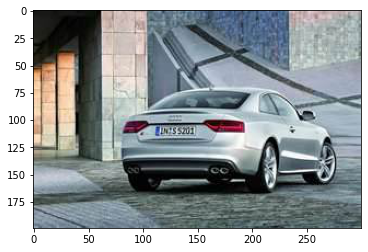

Prediction
    Image name:         ./data/cars_test/00019.jpg
    Predicted class:      Aston
    Predicted score:      0.19000042974948883

{'img_name': './data/cars_test/00019.jpg', 'predicted_class': 'Aston', 'score': 0.19000043}


In [ ]:
img_name = "./data/cars_test/00019.jpg"     # Expected output: Audi

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

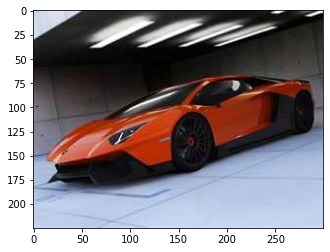

Prediction
    Image name:         ./data/cars_test/00021.jpg
    Predicted class:      Lamborghini
    Predicted score:      0.9931049942970276

{'img_name': './data/cars_test/00021.jpg', 'predicted_class': 'Lamborghini', 'score': 0.993105}


In [ ]:
img_name = "./data/cars_test/00021.jpg"   # Expected output: Lamborghini

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

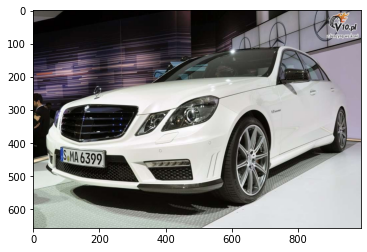

Prediction
    Image name:         ./data/cars_test/00031.jpg
    Predicted class:      Mercedes-Benz
    Predicted score:      0.5631218552589417

{'img_name': './data/cars_test/00031.jpg', 'predicted_class': 'Mercedes-Benz', 'score': 0.56312186}


In [ ]:
img_name = "./data/cars_test/00031.jpg"   # Expected output: Mercedes-Benz

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

<a id='11'></a>
# Model Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_model.csv",
                   split=0.8, 
                   input_size=299, 
                   batch_size=64, 
                   shuffle_data=True,
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_model.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  64
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      174



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True);
# Load model
gtf.Model()
gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
#Start Training
gtf.Train();

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Model_classifier
    Project Dir:     workspace/Model_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Model_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_model.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   64
    Shuffle:      True
    Processors:   3
    Num Classes:  174

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 

In [ ]:
# Load for validation

gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_model_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=1);
gtf.Prototype("Model_classifier", "inception-v3-pytorch", eval_infer=True);

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Model_classifier/inception-v3-pytorch/output/models/final
    Model loaded!

Experiment Details
    Project: Model_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Model_classifier/inception-v3-pytorch/



In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg
import numpy as np

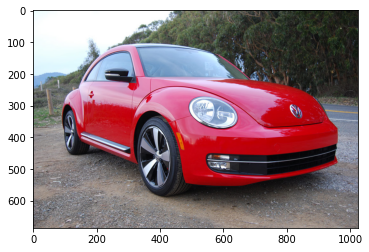

Prediction
    Image name:         ./data/cars_test/00089.jpg
    Predicted class:      Beetle_
    Predicted score:      0.9938145875930786

{'img_name': './data/cars_test/00089.jpg', 'predicted_class': 'Beetle_', 'score': 0.9938146}


In [ ]:
img_name = "./data/cars_test/00089.jpg"     # Expected output: Beetle

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print(predictions)

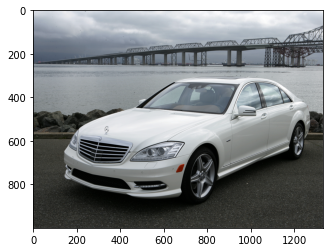

Prediction
    Image name:         ./data/cars_test/00025.jpg
    Predicted class:      S-Class_
    Predicted score:      0.9667057394981384

{'img_name': './data/cars_test/00025.jpg', 'predicted_class': 'S-Class_', 'score': 0.96670574}


In [ ]:
img_name = "./data/cars_test/00025.jpg"     # Expected output: S5

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print(predictions)

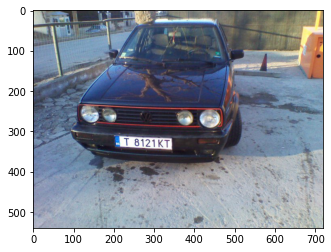

Prediction
    Image name:         ./data/cars_test/00026.jpg
    Predicted class:      Golf_
    Predicted score:      0.948466420173645

{'img_name': './data/cars_test/00026.jpg', 'predicted_class': 'Golf_', 'score': 0.9484664}


In [ ]:
img_name = "./data/cars_test/00026.jpg"   # Expected output: Golf

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print(predictions)

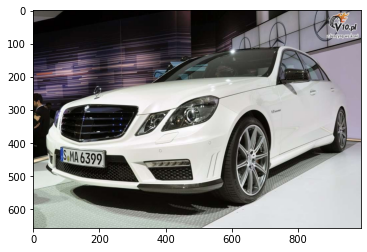

Prediction
    Image name:         ./data/cars_test/00031.jpg
    Predicted class:      E-Class_
    Predicted score:      0.8520073890686035

{'img_name': './data/cars_test/00031.jpg', 'predicted_class': 'E-Class_', 'score': 0.8520074}


In [ ]:
img_name = "./data/cars_test/00031.jpg"   # Expected output: E-Class

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);

print(predictions)

#Year Classifier

In [ ]:
# Load experiment
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch")


gtf.Dataset_Params(dataset_path="data/cars_train",
                   path_to_csv="vehicles_year.csv",
                   split=0.8, input_size=299, 
                   batch_size=128,
                   shuffle_data=True, 
                   num_processors=3)

# Transform
gtf.apply_random_horizontal_flip(train=True, val=True)
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True)

# Set Dataset
gtf.Dataset();

Pytorch Version: 1.6.0+cu101

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/

Dataset Details
    Train path:     data/cars_train
    Val path:       None
    CSV train path: vehicles_year.csv
    CSV val path:   None
    Label Type:     single

Dataset Params
    Input Size:  299
    Batch Size:  128
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.8
    Delimiter:   ,

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6515
    Num val images:   1629
    Num classes:      16



In [ ]:
# Set model parameters
gtf.Model_Params(model_name="inception_v3", freeze_base_network=True, use_gpu=True, use_pretrained=True)

# Load model
gtf.Model()

gtf.Freeze_Layers(num=100)

Model Params
    Model name:           inception_v3
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           inception_v3
        Num layers in model:  194
        Num trainable layers: 2

Model params post freezing
    Num trainable layers: 95



In [ ]:
# Set Training parameters
gtf.Training_Params(num_epochs=5, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=True, save_training_logs=True)

# Using RMSprop optimizer
gtf.optimizer_sgd(0.06)

# Fixed learning rate
gtf.lr_fixed()

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_

Optimizer
    Name:          sgd
    Learning rate: 0.06
    Params:        {'lr': 0.06, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   fixed
    Params: {}



In [ ]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

In [ ]:
gtf.Summary()



Experiment Summary

System
    Project Name:    Year_classifier
    Project Dir:     workspace/Year_classifier/
    Experiment Name: inception-v3-pytorch
    Experiment Dir:  workspace/Year_classifier/inception-v3-pytorch/
    Library:         Pytorch
    Origin:          ['New', 'New']

Dataset
    Status:       True
    Dataset Type: csv_train
    Train path:   data/cars_train
    Val path:     None
    Test path:    False
    CSV Train:    vehicles_year.csv
    CSV Val:      None
    CSV Test:     False

Dataset Parameters:
    Input Size:   299
    Batch Size:   128
    Shuffle:      True
    Processors:   3
    Num Classes:  16

Dataset Transforms:
    Train transforms: [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Val transforms:   [{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]
    Test transforms:  [{'Normalize': {'mean': [0.485, 0.45

In [ ]:
# Load for validation

gtf = prototype(verbose=1)
gtf.Prototype("Year_classifier", "inception_v3", eval_infer=True)


# Set dataset
gtf.Dataset_Params(dataset_path="data/cars_test",
                   path_to_csv = "vehicles_year_test.csv")
gtf.Dataset();


# Validate
accuracy, class_based_accuracy = gtf.Evaluate();

##Run the trained model on some sample images

In [ ]:
# Load model for some sample outputs
gtf = prototype(verbose=1);
gtf.Prototype("Year_classifier", "inception-v3-pytorch", eval_infer=True);

Pytorch Version: 1.6.0+cu101

Model Details
    Loading model - workspace/Year_classifier/inception-v3-pytorch/output/models/final
    Model loaded!

Experiment Details
    Project: Year_classifier
    Experiment: inception-v3-pytorch
    Dir: /content/drive/My Drive/PilotTask/workspace/Year_classifier/inception-v3-pytorch/



In [ ]:
import matplotlib.pyplot as plt     # To display the images
import matplotlib.image as mpimg

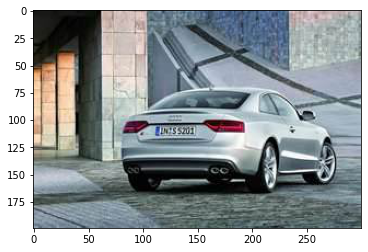

Prediction
    Image name:         ./data/cars_test/00019.jpg
    Predicted class:      2012
    Predicted score:      0.9990944266319275

{'img_name': './data/cars_test/00019.jpg', 'predicted_class': '2012', 'score': 0.9990944}


In [ ]:
img_name = "./data/cars_test/00019.jpg"     # Expected output: 2012

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

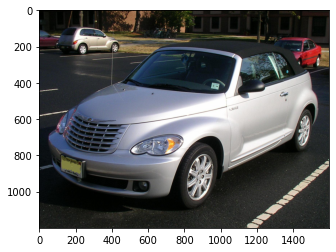

Prediction
    Image name:         ./data/cars_test/00023.jpg
    Predicted class:      2008
    Predicted score:      0.9710294604301453

{'img_name': './data/cars_test/00023.jpg', 'predicted_class': '2008', 'score': 0.97102946}


In [ ]:
img_name = "./data/cars_test/00023.jpg"     # Expected output: 2008

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

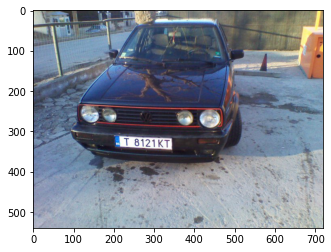

Prediction
    Image name:         ./data/cars_test/00026.jpg
    Predicted class:      1994
    Predicted score:      0.3056204915046692

{'img_name': './data/cars_test/00026.jpg', 'predicted_class': '1994', 'score': 0.3056205}


In [ ]:
img_name = "./data/cars_test/00026.jpg"   # Expected output: 1991

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)

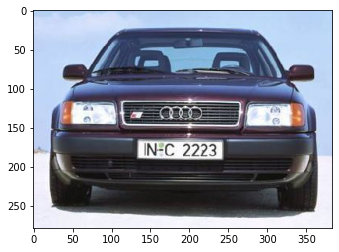

Prediction
    Image name:         ./data/cars_test/00070.jpg
    Predicted class:      1994
    Predicted score:      0.829440712928772

{'img_name': './data/cars_test/00070.jpg', 'predicted_class': '1994', 'score': 0.8294407}


In [ ]:
img_name = "./data/cars_test/00070.jpg"   # Expected output: 1994

img=mpimg.imread(img_name)
plt.imshow(img)
plt.show()

predictions = gtf.Infer(img_name=img_name, return_raw=False);
print(predictions)